In [69]:
import pandas as pd
df = pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [70]:
import numpy as np
X =np.array(df['cgpa'])



y = np.array(df['package'])
# y_25 =np.sort(y)
y_25 = y[0:20]

n =int(len(y_25)*0.10)
# print(n)
# print(y_25[0:n])

mean= np.mean(y[0:-1])
min =np.min(y)
max = np.max(y)
std =np.std(y_25)
print(mean)


2.9993969849246227


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)



In [72]:
# def best_intialize(X_train,y_train):
#     for i in 



In [97]:

def predict(data,w,b):
    prediction =[w*x+b for x in data]
    return prediction


def improve(cost,ya,X_train,w,b,m):
    lr=0.001
    for i in range(1000):
        #decrease value of w and b if cost is negative else increase both
        
        w += lr*cost
        b += lr*cost
        prediction =predict(X_train,w,b)
        cost  = calculate_cost(ya,prediction)

        
        
    return (cost,w,b)
    
def calculate_cost(ya,yp):
    # print("here",ya,yp)
    # print((ya-yp))
    error = [(ya[i]-yp[i]) for i in range(len(ya))]
    cost = sum(error)/len(ya)

    return cost
def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    # print(cost)
    m=X_train.mean()
    cost,w,b = improve(cost,y_train,X_train,w,b,m)
    # print("training",cost)
    prediction =predict(X_test,w,b)
    # cost  = calculate_cost(y_test,prediction)
    # print(prediction)
    # print(cost,w,b)
    return prediction,w,b,cost



prediction,w,b,cost = fit_model(X_train,y_train,1,-0.87)
print(b)
print(w)
# print(y_train)

    


-1.2598625580863914
0.6101374419136101


In [98]:
print(prediction[0])
print(y_train[0])

3.9751166935323834
3.13


# cost is negative (-3.9859) when w=1,b=0
# cost is negative (-5.3839875) when w=1.2,b=0
# cost is negative (-5.8839875) when w=1.2,b=0.5
# conclusion so by increasing value of w and b error increased in negative side , move toward negative side
# cost is posiutive (1.10595) when w=0.2,b=0.5
# cost is positive (1.40595) when w=0.2,b=0.2
# conclusion by decreasing value of w and b the error moved towards positive side /


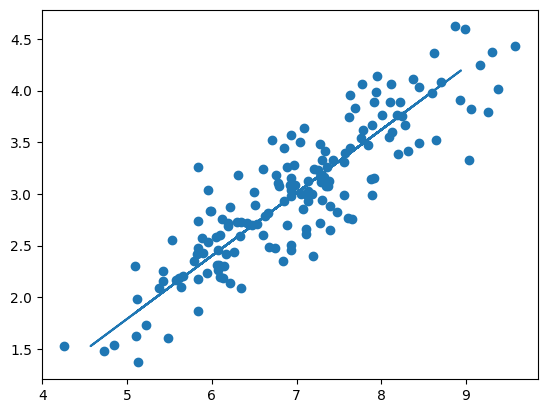

In [99]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X_test,prediction)

In [100]:
print(prediction)
print(y_test)

[3.9751166935323834, 3.1026201515959206, 2.327745600365636, 2.535192330616263, 1.5284655514588068, 1.6626957886798008, 1.9860686328940145, 2.9256802934409736, 3.834785081892252, 2.9317816678601103, 4.194766172621282, 3.5602232330311283, 2.968389914374926, 2.3460497236230444, 3.206343516721234, 3.51141223767804, 1.8457370212538837, 3.267357260912595, 2.974491288794063, 3.4564998679058148, 2.516888207358855, 3.18193801904469, 2.846362425992205, 3.1331270236916016, 3.749365840024348, 2.858565174830477, 3.54191910977372, 3.3771820004570454, 4.005623565628064, 1.864041144511292, 3.712757593509531, 3.2307490143977793, 3.810379584215709, 2.767044558543435, 2.760943184124299, 3.297864133008276, 3.5785273562885367, 2.577901951550216, 2.626712946903305, 2.6877266910946656]
[4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87 3.65 4.   2.89 2.6
 2.99 3.25 1.86 3.67 2.37 3.42 2.48 3.65 2.6  2.83 4.08 2.56 3.58 3.81
 4.09 2.01 3.63 2.92 3.51 1.94 2.21 3.34 3.34 3.23 2.01 2.61]
